Nombre de noeuds : 3
Nombre de elements : 2
k :  [[ 3.20000000e+08  0.00000000e+00 -1.60000000e+08  4.00000000e+07]
 [ 0.00000000e+00  2.66666667e+07 -4.00000000e+07  6.66666667e+06]
 [-1.60000000e+08 -4.00000000e+07  1.60000000e+08 -4.00000000e+07]
 [ 4.00000000e+07  6.66666667e+06 -4.00000000e+07  1.33333333e+07]]
matrice force reduite : 
 [    0.     0. -1000.     0.]
matrice depl reduite : 
 [-6.25e-05 -2.25e-04 -2.00e-04 -3.00e-04]
U :
 [ 0.00e+00  0.00e+00 -6.25e-05 -2.25e-04 -2.00e-04 -3.00e-04]


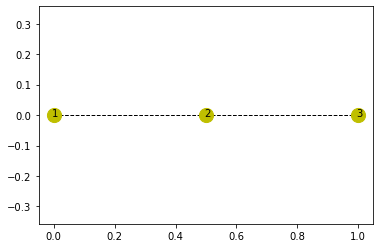

In [39]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
from numpy.linalg import inv

### Etape 1 : on defini notre geometrie
cas = 1
%run ..\..\src\Cas_Test.ipynb
%run ..\..\src\Fonctions.ipynb

NoN = len(NL) # Nombre de noeuds
NoE = len(EL) # Nombre d'elements
print("Nombre de noeuds :", NoN)
print("Nombre de elements :", NoE)

geom(NL,EL)
#plot_forces( NL, F)

### Etapte 2 : On calcule la matrice de raideur dans le repere local dans les coordonnees locales

E = 200e9 # Module D'Young [en Pa]
rho = 7800 # Masse volumique [kg/m3]
L = 1 #Longueur d'un element [m]
h = 0.1 # hauteur [en m]
b = 0.1 # largueur [en m]
S = b*h # Section [en m^2]
I = b*h**3/12 # Inertie [en m]
q = 20000 # Charge repartie (en N/m)

K_el = E*I/L**3*np.array([[12, 6*L , -12, 6*L],
                            [6*L, 4*L**2 , -6*L, 2*L**2],
                            [-12, -6*L, 12, -6*L],
                            [6*L, 2*L**2 , -6*L , 4*L**2]])

M_el = rho*S*L/420*np.array([[156, 22*L, 54, -13*L],
                              [22*L,4*L**2, 13*L, -3*L**2],
                              [54, 13*L, 256, -22*L],
                              [-13*L, -3*L**2, -22*L, 4*L**2]])

def K_elem(L_e) :
    K_elem = E*I/L_e**3*np.array([[12, 6*L_e , -12, 6*L_e],
                            [6*L_e, 4*L_e**2 , -6*L_e, 2*L_e**2],
                            [-12, -6*L_e, 12, -6*L_e],
                            [6*L_e, 2*L_e**2 , -6*L_e , 4*L_e**2]])
    return K_elem

### Etape 3 : On passe la matrice de raideur dans les coordonnees globale (on fait des rotations)

matrices_de_passage = changement_coord(NL,EL)
K_glob = assemblage_2D(matrices_de_passage,NL,EL)


BC = np.array([[0. , 0., 0., 0.],
              [0. , 0., 0., 0.],
              [1. , 0., 0., 0.],
              [0., 1., 0., 0.],
              [0., 0., 1., 0.],
              [0., 0.,0., 1.]])

F = np.array([0, 0, 0, 0, -1000, 0])
#Q = distributed_load_Flexion(NoN,NoE,q)
#F = F #+ Q.flatten()
#BC = bc(NoN)
#F = apply_forces_poutre(NoN)
#plot_forces( NL, F)
F = F.flatten()

K_glob_r = np.transpose(BC).dot(K_glob).dot(BC)
print("k : ",K_glob_r)
F_r = np.transpose(BC).dot(F)
print("matrice force reduite : \n", F_r)
U_r = inv(K_glob_r).dot(F_r)
#try :    
#except : 
#print("Attention Matrice singulière (contient un zéro dans ces termes diagonaux). Manque de condition limite")
print("matrice depl reduite : \n",U_r)
U = BC.dot(U_r)
print("U :\n",U)

delta analytique : 0.00019999999999999993
delta EF : 0.0002000000000000001
ratio theorie/EF : 0.9999999999999992


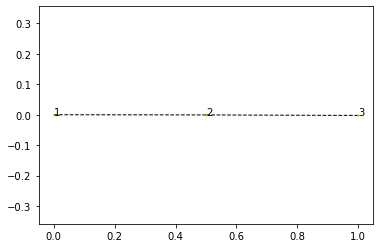

In [40]:
### Etape 10 : Affichage
scale = 1e1

#plt.scatter(NL[:,0],NL[:,1])
#plt.scatter(NL[:,0]+scale*U[::2].flatten(),NL[:,1]+scale*U[1::2])

plot_disp(NL,U,scale)
#geom(NL)
#plot_stress(NL,U)
#norm_x = Normalize(np.abs(color.min()),np.abs(color.max()))*
P = 1000
L = 1
delta = P*L**3/3/E/I
print("delta analytique :",delta)
print("delta EF :", abs(U[-2]))
print("ratio theorie/EF :", abs(delta/U[-2])) #derniere composante est une rotation donc on prend l'avant derniere

### Sources 

* [1]: <https://www.yyy> Vidéo modélisation poutre de Euler Bernoulli
* [2]: <https://www.youtube.com/watch?v=eReuOiF_96k> Vidéo modélisation poutre de Timoshenko
